# Formative Assessment

### The goal

The goal of the assignment is to predict active power of a wind turbine using several input features. The data comes from a wind farm in France, [La Haute Borne Data (2013-2016)](https://opendata-renewables.engie.com/explore/dataset/la-haute-borne-data-2013-2016/table/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6ImxhLWhhdXRlLWJvcm5lLWRhdGEtMjAxMy0yMDE2Iiwib3B0aW9ucyI6e319LCJjaGFydHMiOlt7InR5cGUiOiJsaW5lIiwiZnVuYyI6IkFWRyIsInlBeGlzIjoiYmFfYXZnIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiIzY2YzJhNSJ9XSwieEF4aXMiOiJkYXRlX3RpbWUiLCJtYXhwb2ludHMiOiIiLCJ0aW1lc2NhbGUiOiJ5ZWFyIiwic29ydCI6IiJ9XX0%3D). A total of 139 features are included in the dataset, with several measures of the same feature. For instance, the active power feature is split into the following measurements: `P_min, P_max, P_avg, P_std`. 

The overall tasks are the following:

1. Use a random forest regressor to predict power output. 
2. Perform dimension reduction using PCA.
2. Perform cross validation to determine how well the model generalises. 
3. Determine the importance of the features.
4. Determine the performance of the models as well.

The notebook will guide you as to how to go about fulfilling these overall tasks by doing other smaller subtasks.

Note that the dataset is very large, with 139 columns, so using a bit of domain knowledge we identified the following features that could be using in predicting wind turbine power output. Add to the feature subset as you build the model.



###  Load the data

Import the necessary libraries and load the data. Once loaded, investigate the data. There are two files: data_description.csv lists the variables or features of the dataset. The file wind-data.csv contains the data.

### Libraries.

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline

### Load the data

Load both the data_description.csv and wind-data.csv files.

In [3]:
descript = pd.read_csv('data_description.csv', sep=';')

In [4]:
descript.shape

(34, 4)

In [5]:
descript

,Variable_name,Variable_long_name,Unit_long_name,Comment
0,Va2,Vane_position_2,deg,Second wind vane on the nacelle
1,Ws2,Wind_speed_2,m/s,Second anemometer on the nacelle
2,Ws,Wind_speed,m/s,Average wind speed
3,Wa_c,Absolute_wind_direction_corrected,deg,NaN
4,Na_c,Nacelle_angle_corrected,deg,NaN
5,Ot,Outdoor_temperature,deg_C,NaN
6,Yt,Nacelle_temperature,deg_C,NaN
7,Nf,Grid_frequency,Hz,NaN
8,Nu,Grid_voltage,V,NaN
9,Rm,Torque,Nm,NaN


__Helpful hint__: Load the data into a dataframe. Use the `parse_dates=['Date_time']` argument in the `read_csv` function in order to display dates in later plots.

In [6]:
data = pd.read_csv('wind-data.csv', sep=';', parse_dates=['Date_time'])

In [7]:
data.head()

,Unnamed: 0,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,804808,R80711,2013-04-06 14:20:00,-0.940000,-0.950000,-0.940000,0.0,10.59,10.000000,11.0,...,NaN,NaN,358.870000,NaN,NaN,NaN,351.670010,NaN,NaN,NaN
1,732424,R80711,2015-12-22 14:30:00,-0.990000,-0.990000,-0.990000,0.0,17.00,17.000000,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,312987,R80711,2016-03-20 20:40:00,-0.990000,-0.990000,-0.990000,0.0,12.88,12.000000,13.0,...,NaN,NaN,44.849998,NaN,NaN,NaN,44.849998,NaN,NaN,NaN
3,68152,R80711,2016-01-09 01:00:00,45.000000,45.000000,45.000000,0.0,12.95,12.000000,13.0,...,NaN,NaN,243.020000,NaN,NaN,NaN,243.020000,NaN,NaN,NaN
4,231878,R80721,2014-12-14 13:20:00,44.990002,44.990002,44.990002,0.0,16.99,16.110001,17.0,...,NaN,NaN,195.060000,NaN,NaN,NaN,308.239990,NaN,NaN,NaN


### Explore the data

Once you've loaded the data into a pandas dataframe, explore the data. You may start by generating summary statistics, identifying any missing values, and filling in missing values. Generate visualizations of the features as a way to start understanding the distribution of the data.

In [8]:
data.describe()

,Unnamed: 0,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
count,100000.000000,99434.000000,99434.000000,99434.000000,99434.000000,99434.000000,99434.000000,99434.000000,99434.000000,99434.000000,...,0.0,0.0,95957.000000,0.0,0.0,0.0,95957.000000,0.0,0.0,0.0
mean,420315.817680,13.895284,12.843969,15.299697,0.821932,19.296322,19.100206,19.517049,0.106288,1054.617672,...,NaN,NaN,177.366418,NaN,NaN,NaN,178.221646,NaN,NaN,NaN
std,242726.140649,28.341010,28.196735,28.856883,3.785026,6.178154,6.188843,6.181887,0.157178,626.441120,...,NaN,NaN,95.942759,NaN,NaN,NaN,96.146789,NaN,NaN,NaN
min,29.000000,-121.260000,-121.260000,-121.260000,0.000000,0.000000,0.000000,0.000000,0.000000,-574.900020,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,210471.750000,-0.990000,-1.000000,-0.990000,0.000000,14.030000,14.000000,15.000000,0.000000,964.030030,...,NaN,NaN,84.269997,NaN,NaN,NaN,85.010002,NaN,NaN,NaN
50%,420179.500000,-0.970000,-0.990000,-0.500000,0.000000,19.000000,19.000000,19.000000,0.000000,1178.130000,...,NaN,NaN,194.690000,NaN,NaN,NaN,196.050000,NaN,NaN,NaN
75%,630450.750000,6.157500,-0.500000,24.075000,0.130000,24.000000,24.000000,24.000000,0.210000,1563.830000,...,NaN,NaN,247.730000,NaN,NaN,NaN,249.220000,NaN,NaN,NaN
max,840370.000000,262.609990,262.609990,262.609990,47.740002,39.000000,39.000000,39.000000,0.940000,1806.660000,...,NaN,NaN,359.989990,NaN,NaN,NaN,359.989990,NaN,NaN,NaN


In [9]:
data.index

RangeIndex(start=0, stop=100000, step=1)

In [10]:
data.columns

Index(['Unnamed: 0', 'Wind_turbine_name', 'Date_time', 'Ba_avg', 'Ba_min',
       'Ba_max', 'Ba_std', 'Rt_avg', 'Rt_min', 'Rt_max',
       ...
       'Pas_max', 'Pas_std', 'Wa_c_avg', 'Wa_c_min', 'Wa_c_max', 'Wa_c_std',
       'Na_c_avg', 'Na_c_min', 'Na_c_max', 'Na_c_std'],
      dtype='object', length=139)

### Taking a look at a correlation matrix of the data

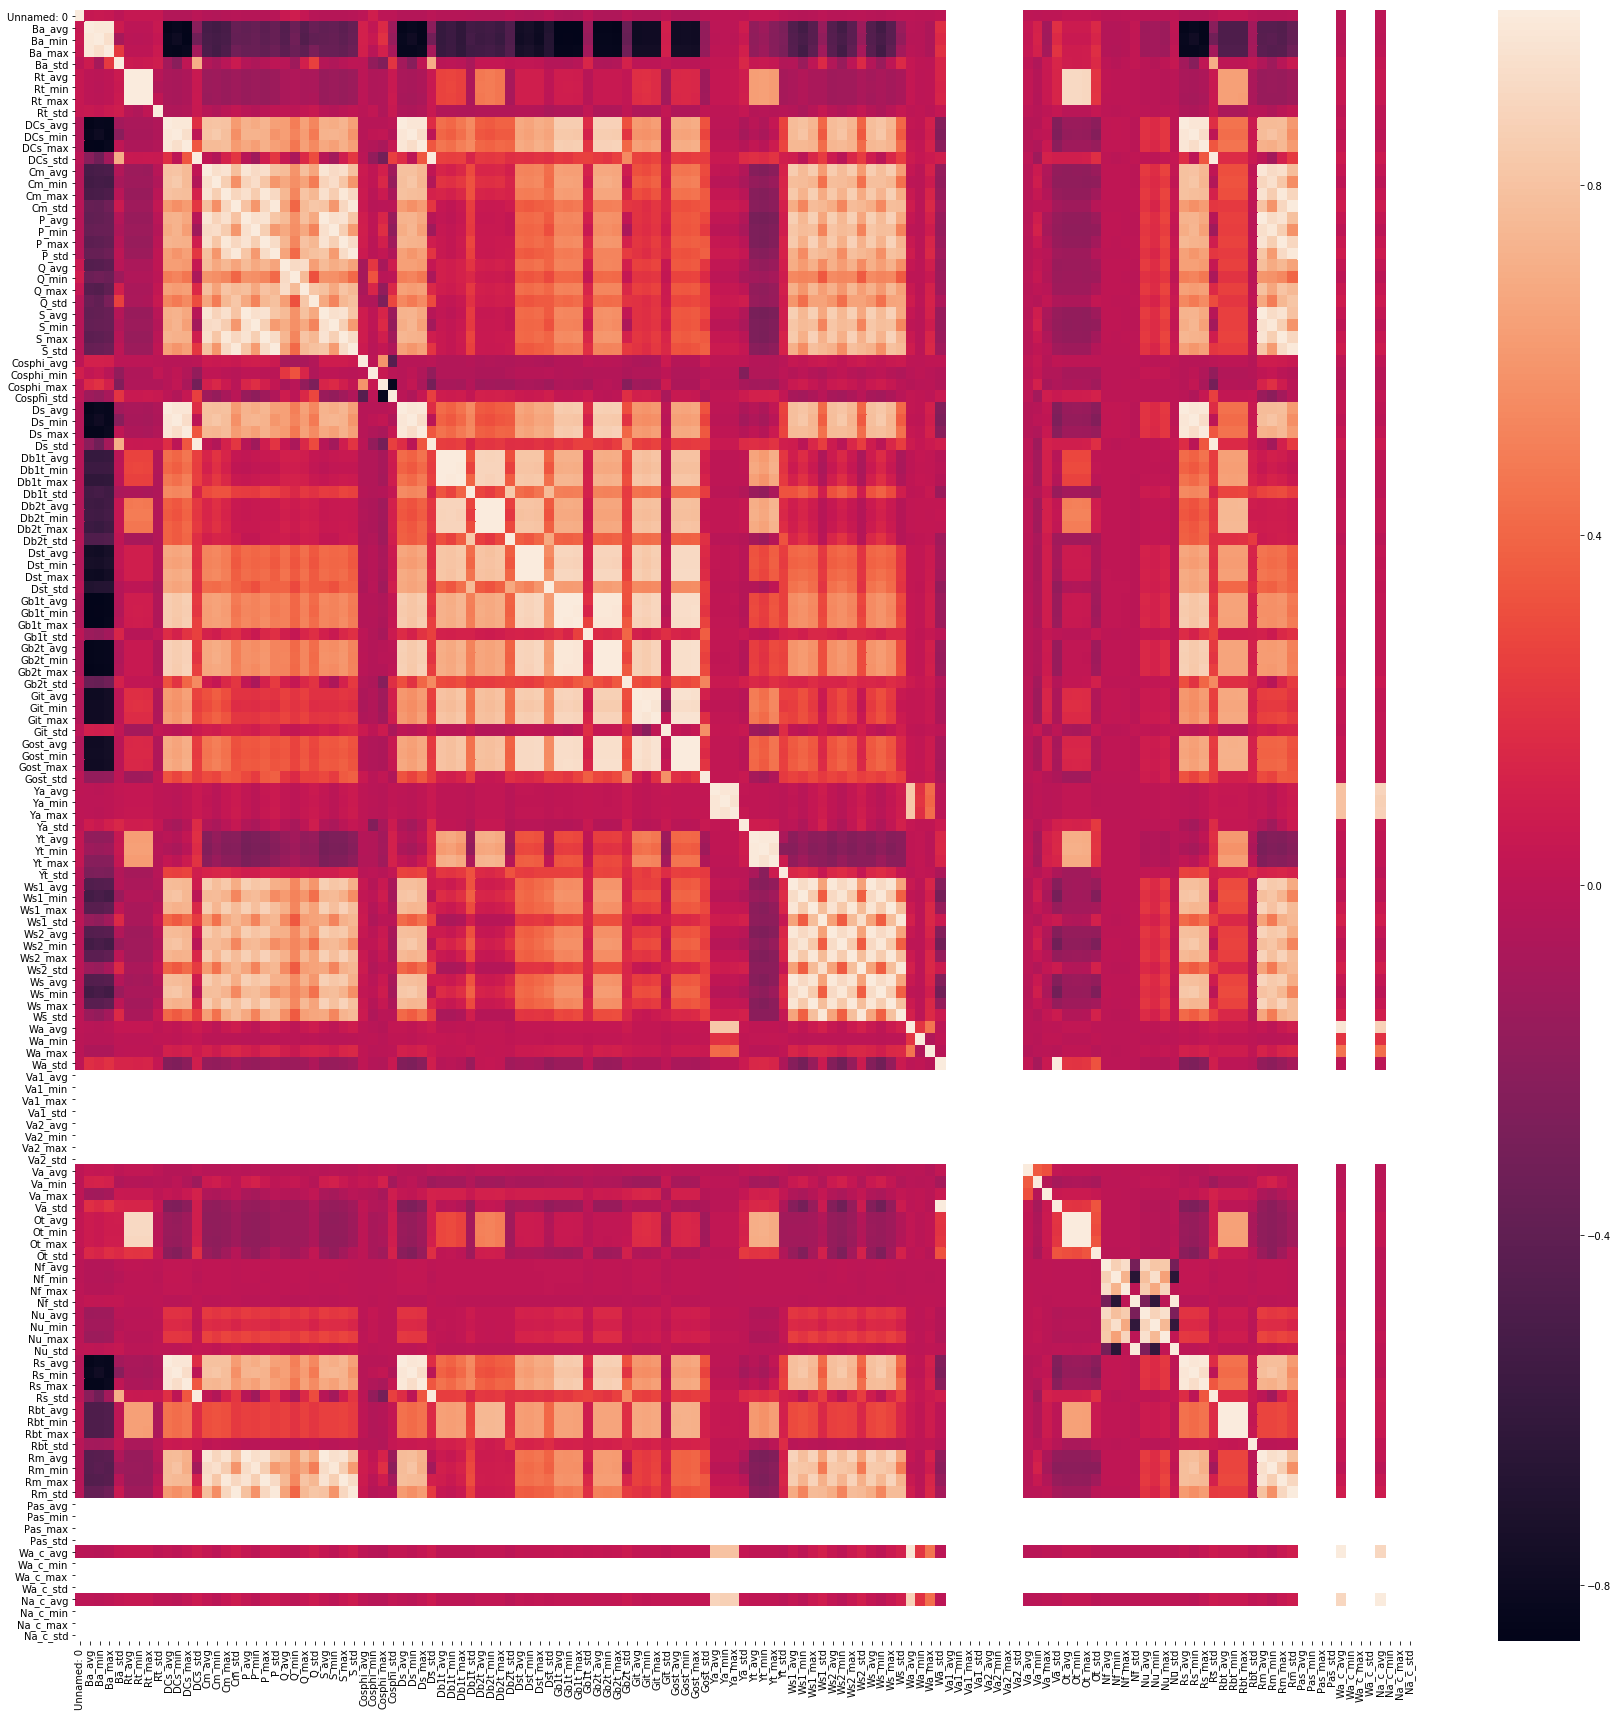

In [11]:
corr = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Because we are investigating power output, the active power feature is given by the following features in  the dataset: `P_avg, P_min, P_max, P_std`. Decide on which active power feature to use (hint: perhaps the average or maximum would be a good place to start). Begin by using the function `groupby` to determine how many turbines there are in the dataset. The dataset is huge, so in order to visualize trends in power output, a simpler way would be to look at monthly trends in the data.

#### How many years of P_avg is in the data set?

Text(0,0.5,'Power in units')

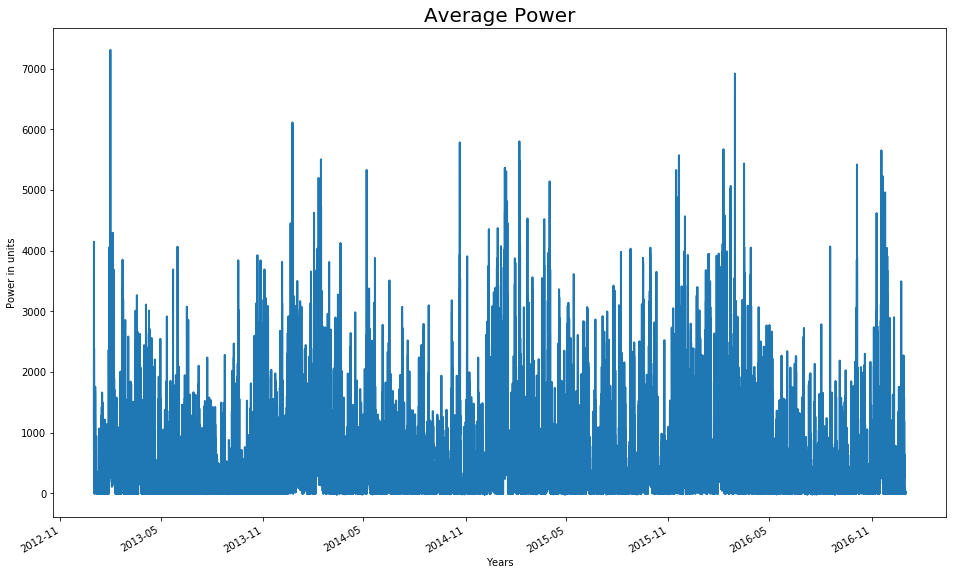

In [11]:
data_dates = data.groupby(['Date_time']).sum()
data_dates['P_avg'].plot(figsize=(16, 10), linewidth=2)
plt.title("Average Power", fontsize=20)
plt.xlabel("Years")
plt.ylabel("Power in units")

#### Making new data set with only the features I am interested in

In [12]:
data_explore = data.filter(['Date_time','Wind_turbine_name','P_avg','P_max', 'Ya_avg', 'Ws2_avg', 'Wa_avg'], axis=1)

In [13]:
data_explore = data_explore.loc[data_explore['Wind_turbine_name'] == 'R80711']

In [14]:
data_explore.head()

,Date_time,Wind_turbine_name,P_avg,P_max,Ya_avg,Ws2_avg,Wa_avg
0,2013-04-06 14:20:00,R80711,484.29001,679.60999,351.670010,7.09,358.870000
1,2015-12-22 14:30:00,R80711,523.26001,727.02002,185.520000,6.63,190.880000
2,2016-03-20 20:40:00,R80711,228.82001,387.01001,32.930000,5.72,44.849998
3,2016-01-09 01:00:00,R80711,0.00000,0.00000,190.970000,1.68,243.020000
5,2013-11-13 14:30:00,R80711,496.42999,723.42999,36.509998,6.64,24.370001


There is a wind turbine with `Wind_turbine_name` R80711. Use this column and determine the trend for the month of January.

In [15]:
data_explore.index = data_explore['Date_time']

In [16]:
data_explore['Date_time'] = pd.to_datetime(data_explore['Date_time'])

In [17]:
jan1 = data_explore['2013-01-01':'2013-02-01']    #2013
jan2 = data_explore['2014-01-01':'2014-02-01']    #2014
jan3 = data_explore['2015-01-01':'2015-02-01']    #2015
jan4 = data_explore['2016-01-01':'2016-02-01']    #2016

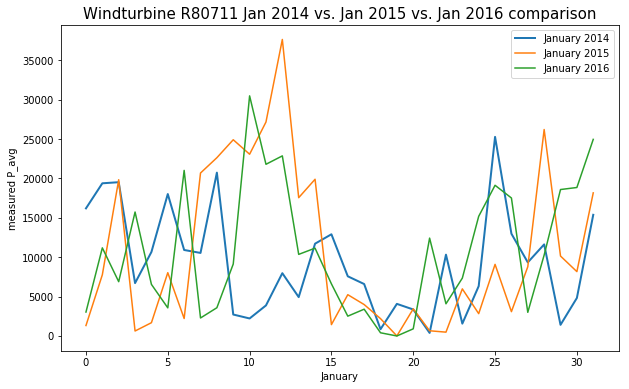

In [18]:
axis = jan2.resample('1D').sum().reset_index()['P_avg'].plot(figsize=(10, 6), linewidth=2)
jan3.resample('1D').sum().reset_index()['P_avg'].plot(ax=axis)
jan4.resample('1D').sum().reset_index()['P_avg'].plot(ax=axis)
plt.title("Windturbine R80711 Jan 2014 vs. Jan 2015 vs. Jan 2016 comparison", fontsize=15)
plt.xlabel("January")
plt.ylabel("measured P_avg")
plt.legend(['January 2014','January 2015','January 2016'])
plt.show()

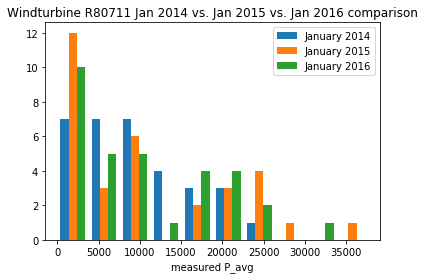

In [19]:
plt.hist((jan2.resample('1D').sum().reset_index()['P_avg'], jan3.resample('1D').sum().reset_index()['P_avg'], jan4.resample('1D').sum().reset_index()['P_avg']))
plt.title("Windturbine R80711 Jan 2014 vs. Jan 2015 vs. Jan 2016 comparison")
plt.xlabel("measured P_avg")
#plt.ylabel("January")
plt.legend(['January 2014','January 2015','January 2016'])
plt.show()

### Looking at the month of January

When comparing the P_Avg output of Wind turbine R80711 of the month of January over the last three years I can see that the average output has increased (possibly optimized the turbine) as well as a spice in out is common around the 11th for the years 2015 and 2016.

### Some other correlations

##### Average Power vs. average Necelle angle

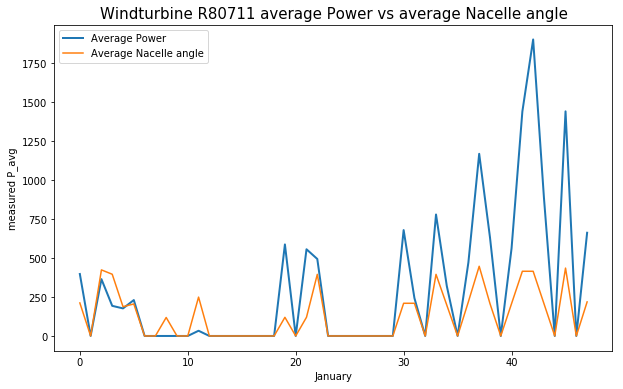

In [20]:
jan1day = data_explore['2016-01-01':'2016-01-02']    #2016
axis = jan1day.resample('1H').sum().reset_index()['P_avg'].plot(figsize=(10, 6), linewidth=2)
jan1day.resample('1H').sum().reset_index()['Ya_avg'].plot(ax=axis)
plt.title("Windturbine R80711 average Power vs average Nacelle angle", fontsize=15)
plt.xlabel("January")
plt.ylabel("measured P_avg")
plt.legend(['Average Power','Average Nacelle angle'])
plt.show()

#####  Average Power vs. Average Wind direction 

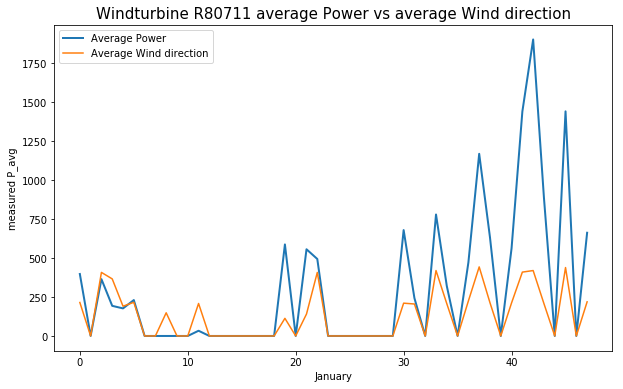

In [21]:
jan1day = data_explore['2016-01-01':'2016-01-02']    #2016
axis = jan1day.resample('1H').sum().reset_index()['P_avg'].plot(figsize=(10, 6), linewidth=2)
jan1day.resample('1H').sum().reset_index()['Wa_avg'].plot(ax=axis)
plt.title("Windturbine R80711 average Power vs average Wind direction", fontsize=15)
plt.xlabel("January")
plt.ylabel("measured P_avg")
plt.legend(['Average Power','Average Wind direction'])
plt.show()

Looking at the graph's above you can clearly see a correlation of power produced and the angle of the wind turbine (from the necle angle and wind direction).

I as not able to draw a correlation of the wind speed and power output unfortunately.

### Find missing values

A dataset with missing values will not be usable for fitting and testing a model. Fill in missing values in a way suitable for the model.

In [22]:
data_explore = data_explore.fillna(data_explore.median(axis=0))

In [23]:
data_explore.isnull().sum()

Date_time            0
Wind_turbine_name    0
P_avg                0
P_max                0
Ya_avg               0
Ws2_avg              0
Wa_avg               0
dtype: int64

### Proceeding with a subset of data

I used only the one turbine with the selected features 

### Split dataset into predictor and target matrices

In [24]:
# Values of target
y = data_explore['P_avg'].values

# Values of attributes
dataset = data_explore.drop(['Date_time','Wind_turbine_name','P_avg','P_max'], axis=1)
X = dataset.values

Determine the number of features in the test subset of the data set

In [25]:
number_features = len(dataset.columns)

### Dimension Reduction with PCA

The dataset we have it quite huge. We need to select features to use for our analysis of the active power. To discover the principal features, we can principal component analysis. First split the data into predictor and target variables. PCA allows you to reduce the number of you predictors, and to decorrelate them especially for features that have a direct relationship like apparent power, reactive power and active power.

In [26]:
pca=PCA(n_components=number_features)                                    
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Determine the number of components

In [27]:
pca=PCA(n_components=number_features)                                    
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
PCA(copy=True, n_components=None, whiten=False)
pca.components_

array([[  7.08850555e-01,  -3.64260743e-05,   7.05358696e-01],
       [  7.05356324e-01,  -2.55747006e-03,  -7.08848303e-01],
       [  1.82975431e-03,   9.99996729e-01,  -1.78717071e-03]])

### Plot the variance

Explained varience ratio

In [29]:
pca.explained_variance_ratio_

array([  9.14414134e-01,   8.52337427e-02,   3.52123682e-04])

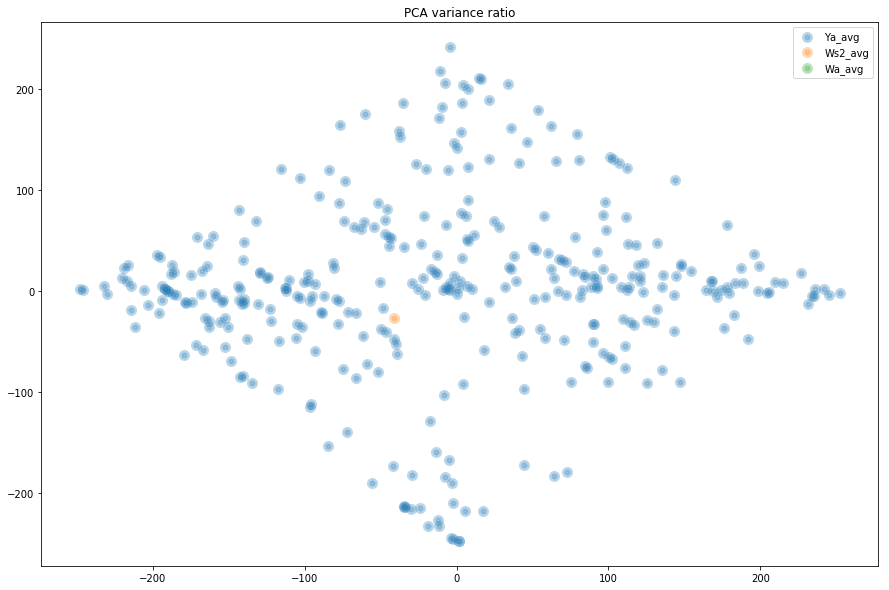

In [30]:
# from http://scikit-learn.org

plt.figure(figsize=(15, 10))
lw = 5

X_r = pca.fit(X).transform(X)

for i, dataset in zip([0, 1, 2], dataset):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=.3, lw=lw, label=dataset)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA variance ratio')
plt.show()

### PCS variance ratio

Looking at the graph there are no outlier’s and we have some clustering of data along the X axes.

Looking at the sum of the explained variance with n number of features

In [31]:
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
variance

array([ 91.4,  99.9,  99.9])

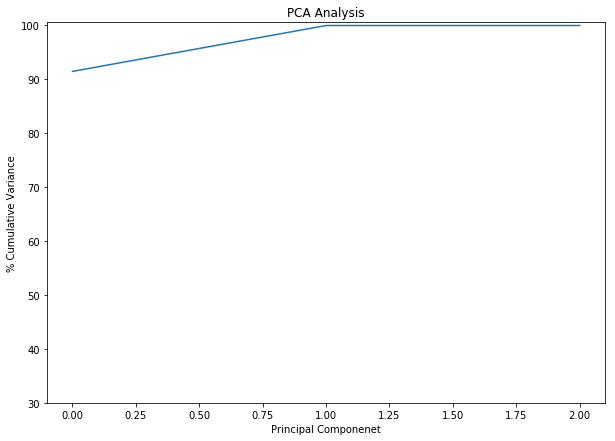

In [32]:
plt.figure(figsize=(10, 7))

plt.ylabel('% Cumulative Variance')
plt.xlabel('Principal Componenet')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(variance)

### Random Forest with PCA

Construct a PCA and Random Forest Regressor pipeline. A pipeline is a term for the processing of data until it reaches a form that is usable for the machine learning algorithm. Now there is an actual pipeline module you'll need to use, that streamlines the process of dimension reduction and application of the machine learning algorithm, in this case the random forest regression model. For now, use the first two principal components to construct the pipeline.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##### Transforming the data

Looking at the practice book I need to: center the data around a mean of zero and variance of one.

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### Fit the model

In [37]:
#model = RandomForestRegressor(n_jobs=-1, min_impurity_decrease=10)
model = RandomForestRegressor(n_jobs=-1)

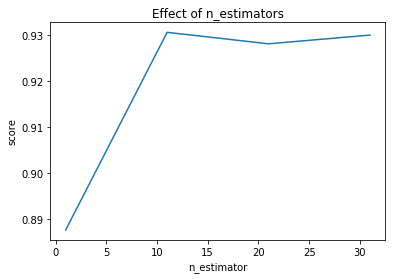

In [38]:
# Try different numbers of n_estimators or trees - this will take a minute or so
estimators = np.arange(1, 33, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

##### Predict

In [39]:
y_predicted = model.predict(X_test)

In [41]:
y_predicted2 = model.predict(X_test)

In [42]:
len(y_predicted), len(y_test)

(7539, 7539)

##### Determine the accuracy

In [43]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predicted)

In [44]:
score

0.93005233880955818

### Plot the principal components

Select the first two components and display them. As rule of thumb, the first to components are selected as they are easier to display in a 2-dimensions.

#### Logistic Regression based on first and second principal components

In [73]:
#changed the Logistic regression to Linear regrssion and it works

# "rule of thumb"
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

logistic = linear_model.LinearRegression()
pipeline = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

### Getting ready to plot the first and second principle components    

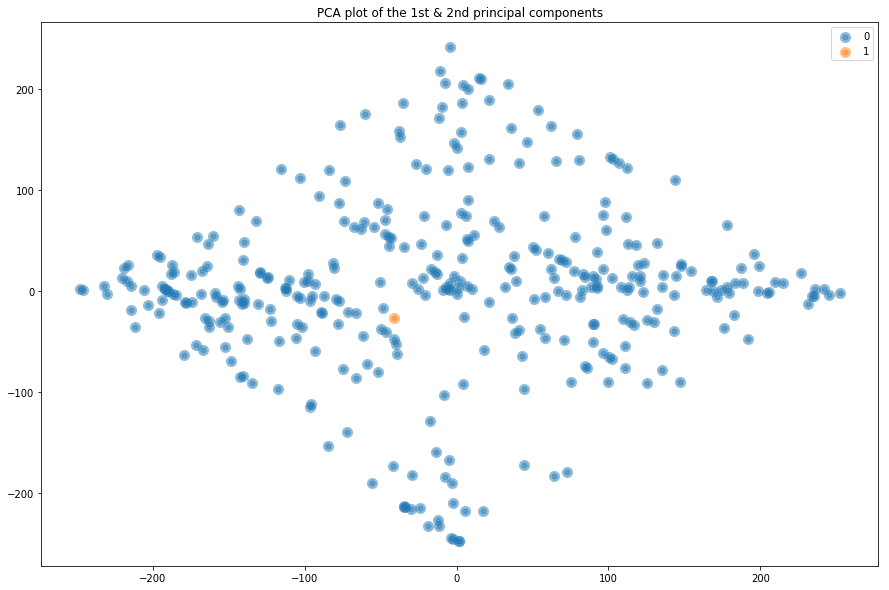

In [46]:
plt.figure(figsize=(15, 10))

lw = 5

for i, target_name in zip([0, 1, 2], [0, 1]):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=.5, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA plot of the 1st & 2nd principal components')

plt.show()

### Comparing the two scatter plots

I can see that the scatter plots of the PCS variance ratio and the PCS plot of the 1st and 2nd principal components appear to loot the same. The PCS with 1st and 2nd principal components does point out one feature for us though in orange.

### Split dataset in training and test sets

Split the data into training and test sets and use the pipeline to fit and test the model.

##### Split dataset in train and test subsets

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##### Fit model

In [96]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

##### Predict

In [97]:
y_pred = pipeline.predict(X_test)

In [98]:
y_pred

array([ 393.66164543,  394.15081799,  391.05639925, ...,  396.80991038,
        392.20190587,  394.1569022 ])

In [99]:
y_test

array([ 522.23999 ,   62.619999,  904.21997 , ...,   21.139999,
        545.5     ,   11.47    ])

### Evaluate the results

Using the `sklearn.metrics` moduel determine the accuracy score, i.e., the coefficient of determination $R^2$ of the prediction.

In [100]:
# Score
pipeline.score(X_test, y_test)

-0.00013982349345842415

In [101]:
# F-measure
f1_score(y_test, y_pred, average='micro')

TypeError: 'float' object is not callable

### Building the confusion Matrix

In [102]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

ValueError: continuous is not supported

In [86]:
# Normalized (%)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)

NameError: name 'cm' is not defined

In [ ]:
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion matrix')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### References

Referred to for determination of input features to predict power output: [Forecasting Wind Power](https://lucdemortier.github.io/articles/17/WindPower).

[Selecting good features – Part IV: stability selection, RFE and everything side by side](http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/)